# TOC:
* [FDR corrected maps](#fdr-bullet)
* [Voxel-wise thresholded maps](#voxel-bullet)
* [Concatenate subject scans](#concat-bullet)
* [Cluster extent corrected maps](#cluster-bullet)
* [TFCE corrected positive SV maps](#tfce_pos-bullet)
* [TFCE corrected negative SV maps](#tfce_neg-bullet)
* [ROI analysis](#roi-bullet)

In [1]:
# load modules
from scipy.stats import stats
import scipy.io as spio
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from nilearn.input_data import NiftiMasker
import nilearn.plotting as plotting
from nilearn.image import mean_img
from nilearn import image
# import pickle
import pandas as pd
import seaborn as sns 

import nipype.pipeline.engine as pe
from nipype.interfaces import spm
from nipype.interfaces import fsl


%matplotlib inline 
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})

/gpfs/ysm/project/rj299/conda_envs/py37_dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


210726-15:17:15,705 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.5.1)


Autosaving every 5 seconds


In [2]:
from nipype.interfaces.matlab import MatlabCommand
MatlabCommand.set_default_paths('/home/rj299/project/MATLAB/toolbox/spm12/') # set default SPM12 path in my computer.

fsl.FSLCommand.set_default_output_type('NIFTI_GZ')

base_root = '/home/rj299/scratch60/mdm_analysis/'
data_root = '/home/rj299/project/mdm_analysis/'
out_root = '/home/rj299/scratch60/mdm_analysis/output'

# Subjects included in analysis
sub_num = [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 
           2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 
           2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 
           2664, 2665, 2666]
sub_num = [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 
           2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 
           2654, 2655, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 
           2664, 2665, 2666]

sub_num.sort()
print('All subjects included in analysis:', sub_num)
print(len(sub_num), 'subjects')

All subjects included in analysis: [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 2654, 2655, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666]
32 subjects


In [3]:
# load anatomical
anat_mean = nib.load(os.path.join(data_root, 'output','imaging', 'all_sub_average.nii.gz'))

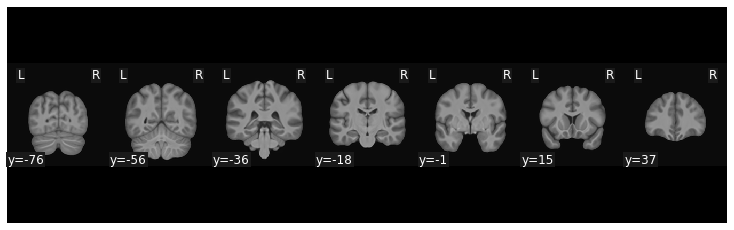

In [4]:
fig = plt.figure(figsize = (10,3))
plotting.plot_anat(anat_mean, black_bg = True, figure = fig,
                  display_mode = 'y')

### First level result (single participant)

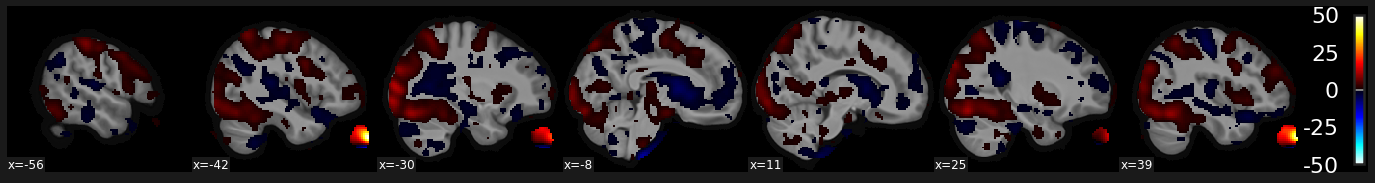

In [5]:
# contrast
con_id = '0002'
plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_2073/con_%s.nii' %con_id,
                       anat_mean,
                      threshold = 1,
                      display_mode = 'x')

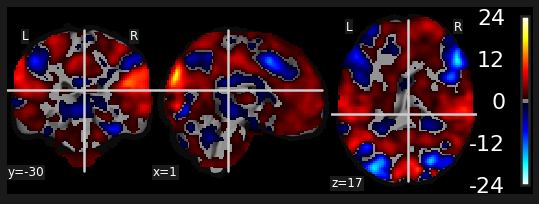

In [6]:
# t map
con_id = '0014'
plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_2073/spmT_%s.nii' %con_id,
                       anat_mean,
                      threshold = 0.7,
#                       display_mode = 'x',
                      )

### FDR thresholded <a class = "anchor" id = "fdr-bullet"></a>

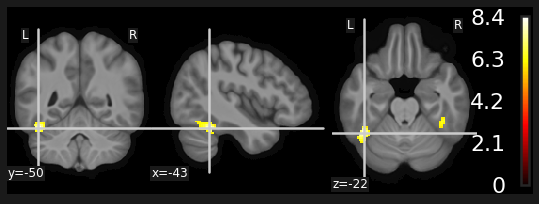

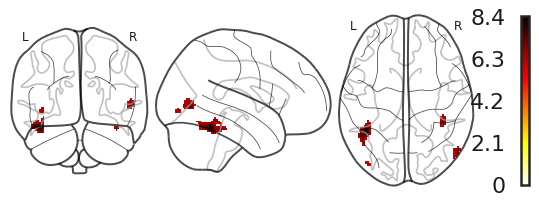

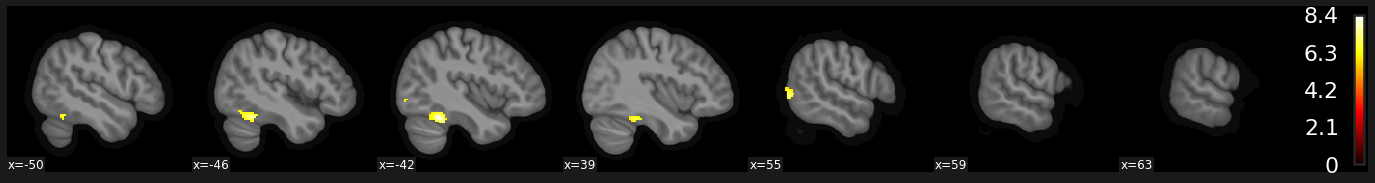

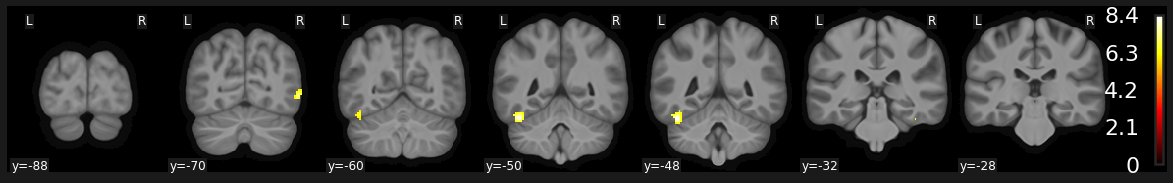

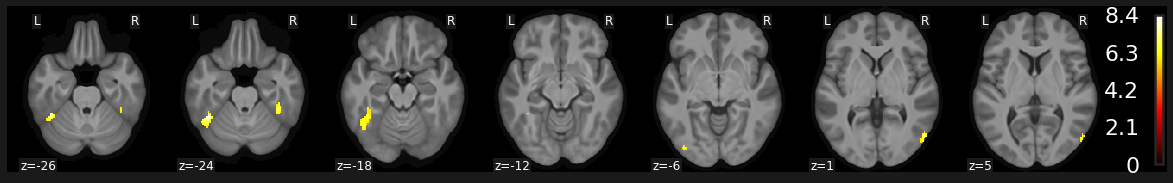

In [5]:
# second-level output: FDR corrected

con_id = '0009' # medical > monetary
plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean)

plotting.plot_glass_brain('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       colorbar = True)

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'x')

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'y')

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'z')

## Voxel-size thresholding <a class = "anchor" id = "voxel-bullet"></a>

Without correction just voxel-wise threshold

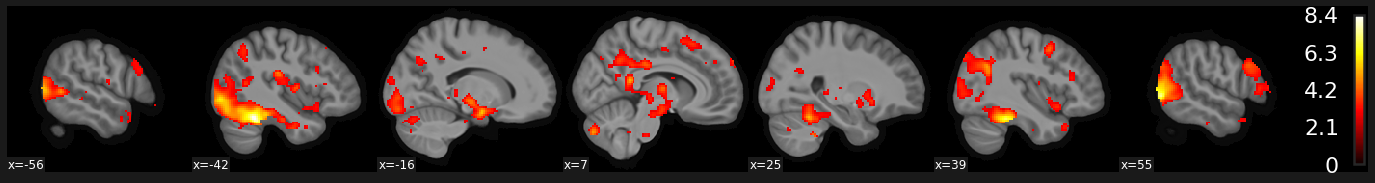

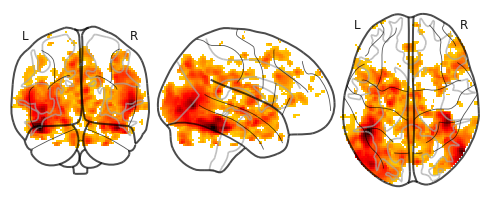

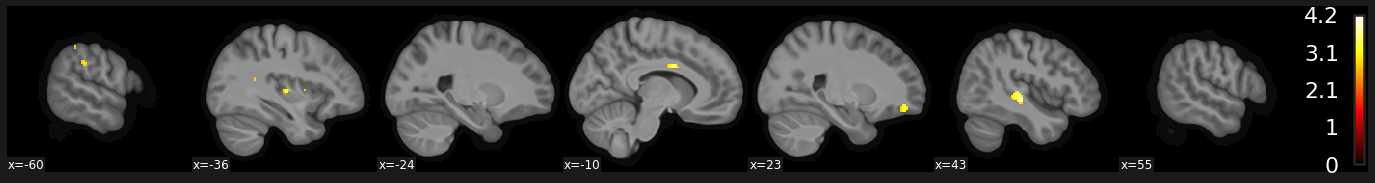

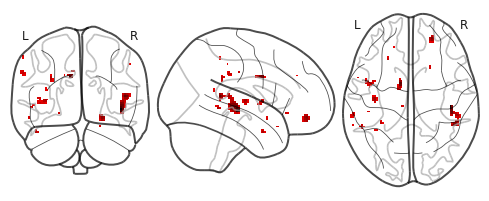

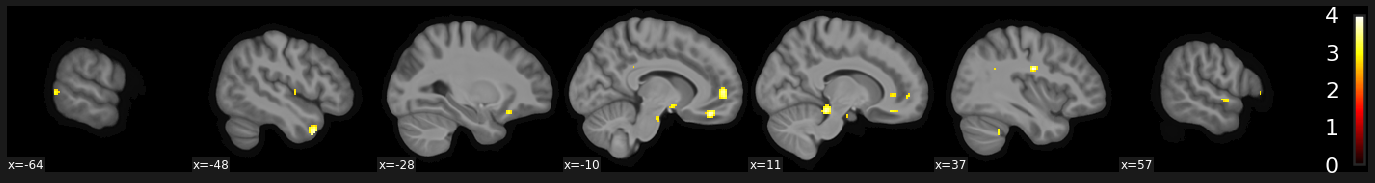

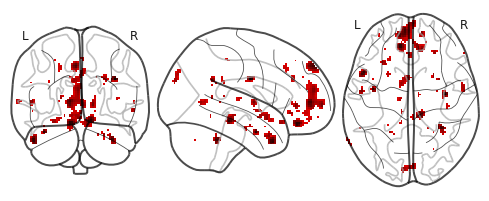

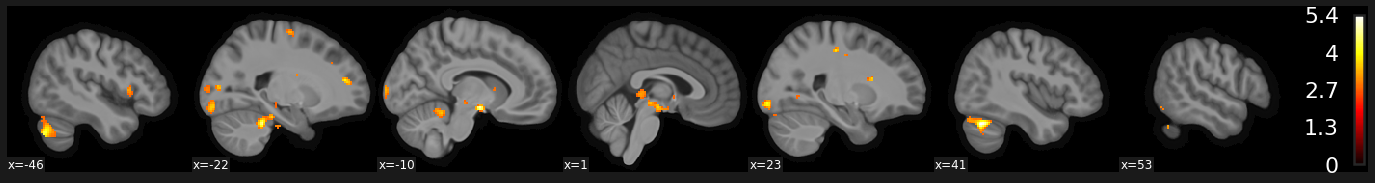

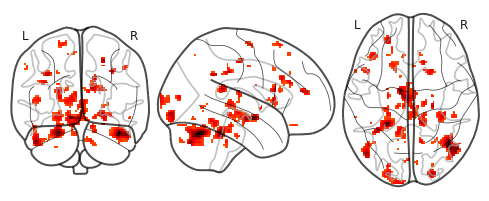

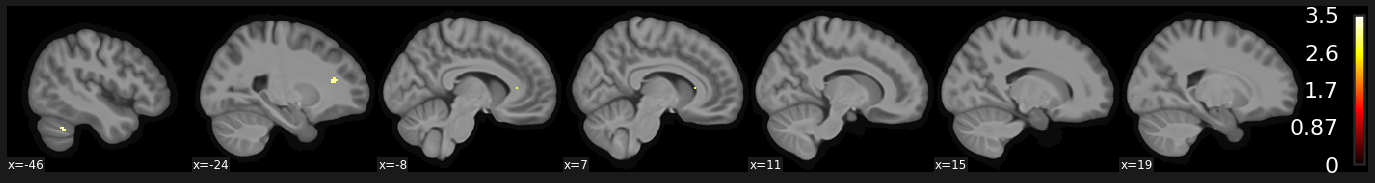

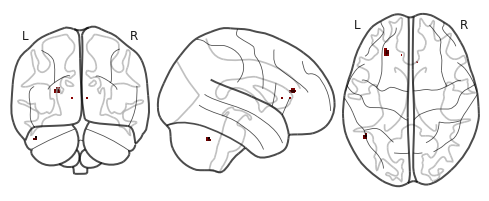

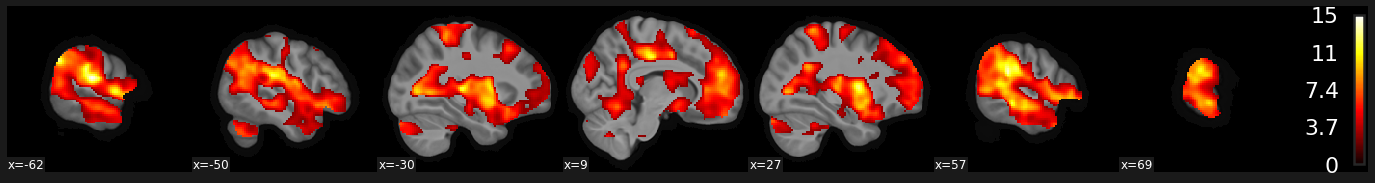

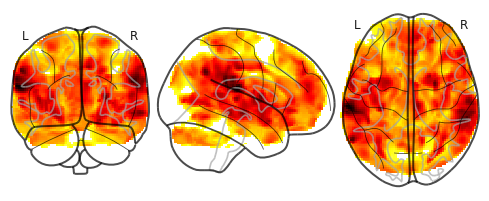

In [6]:
# voxel-wise p threshold
voxel_threshold = 0.005
con_ids = ['0009', '0010', '0011', '0012', '0013', '0014'] # Med>Mon, Med_amb_rating, Med_risk_rating, Mon_amb_rating, Mon_risk_rating, Response

for con_id in con_ids:

    spm_thr = spm.Threshold(contrast_index=1,
                            spm_mat_file = os.path.join(out_root, 'imaging', 'Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/SPM.mat' %con_id),
                            stat_image = os.path.join(out_root, 'imaging', 'Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001.nii' %con_id),
                            use_topo_fdr=False,
                            use_fwe_correction=False, # here we can use fwe or fdr, default is true
    #                         extent_threshold=10,
                            height_threshold= voxel_threshold, # default is 0.05
    #                         extent_fdr_p_threshold = 0.05,
                            height_threshold_type='p-value', # default is p-value
                            )
    spm_thr.run()

    # plot 
    plotting.plot_stat_map('/home/rj299/project/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii',
                          bg_img = anat_mean,
                           display_mode = 'x')
    
    plotting.plot_glass_brain('/home/rj299/project/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii')
    # plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_pre_topo_thr.nii')

## Concatenate all subjects' contrast <a class = "anchor" id = "concat-bullet"></a>

In [ ]:
con_id = '0009'
con_filenames = ['/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_*/con_%s.nii' %con_id]

con_all = {}

for i in sub_num:
    con_image = glob.glob('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_' + str(i) + '/con_%s.nii' %con_id)
    con_all[str(i)] = list(con_image)
print(len(con_all))
con_all

In [ ]:
smooth_con_all = []

for k, v in con_all.items():
    smooth_con = image.smooth_img(v[0],None) #  If fwhm is None, no filtering is performed (useful when just removal of non-finite values is needed).
    print(v)
    smooth_con_all.append(smooth_con)
    
#     plotting.plot_glass_brain(smooth_con, colorbar = True)

In [9]:
# from nilearn import image
con_concat = image.concat_imgs(smooth_con_all, auto_resample = True)
con_concat.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_rating', 'rating_glm_con%s_all_sub.nii.gz' %con_id))

In [46]:
# con_single = image.index_img(con_concat, 0)
# plotting.plot_glass_brain(con_single, colorbar = "w")

In [47]:
# for con_single in image.iter_img(con_concat):
#     plotting.plot_glass_brain(con_single, display_mode = 'lyrz', colorbar = "w")

In [10]:
# flip sign for the Mon > Med contrast
smooth_con_flip_all = []

for smooth_img in smooth_con_all:
    smooth_img_flip = image.math_img("-img", img=smooth_img)
    smooth_con_flip_all.append(smooth_img_flip)
    
con_concat_flip = image.concat_imgs(smooth_con_flip_all, auto_resample = True)
con_concat_flip.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_rating', 'rating_glm_con%s_flip_all_sub.nii.gz' %con_id))

## Cluster extent <a class = "anchor" id = "cluster-bullet"></a>

In [ ]:
# conduct cluster-extent thresholding
# voxel-wise p threshold
voxel_threshold = 0.001
con_ids = ['0009']

for con_id in con_ids:

    spm_thr = spm.Threshold(contrast_index=1,
                            spm_mat_file = os.path.join(out_root, 'imaging', 'Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/SPM.mat' %con_id),
                            stat_image = os.path.join(out_root, 'imaging', 'Sink_resp_rating/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001.nii' %con_id),
                            use_topo_fdr=False,
                            use_fwe_correction=False, # here we can use fwe or fdr, default is true
    #                         extent_threshold=10,
                            height_threshold= voxel_threshold, # default is 0.05
    #                         extent_fdr_p_threshold = 0.05,
                            height_threshold_type='p-value', # default is p-value
                            )
    spm_thr.run()

    # find the critical p value for a certain threshold
    t = nib.load('/home/rj299/project/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii')
    t_data = t.get_data()
    t_data_mask = ~np.isnan(t_data)
    t_critical = np.min(t_data[t_data_mask])
    t_critical

    # cluster extent threshold, using the preivous t_critical for initial thresholing
    cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_rating', 'rating_glm_con%s_all_sub.nii.gz' %con_id),
                                mask = '/home/rj299/project/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                                base_name = os.path.join(out_root, 'imaging', 'Sink_resp_rating', 'con%s_p%s' %(con_id, voxel_threshold)),
                                c_thresh = t_critical,
                                one_sample_group_mean = True,
                                tfce = False,
                                vox_p_values = True, 
    #                             raw_stats_imgs = True,
                                num_perm = 5000)
    cluster_thr.run()
    

0.9998

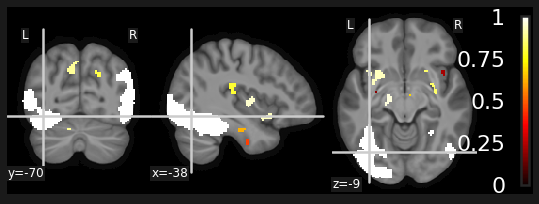

In [14]:
# visualize p values
con_id = '0009'
voxel_threshold = 0.001

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p%s_clustere_corrp_tstat1.nii.gz' %(con_id, voxel_threshold),
                      bg_img = anat_mean,
#                       threshold = 0
                      )

p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p%s_clustere_corrp_tstat1.nii.gz' %(con_id, voxel_threshold))

p_data = p.get_data()
np.max(p_data)

/gpfs/ysm/project/rj299/conda_envs/py37_dev/lib/python3.7/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


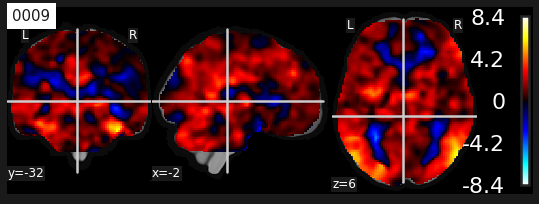

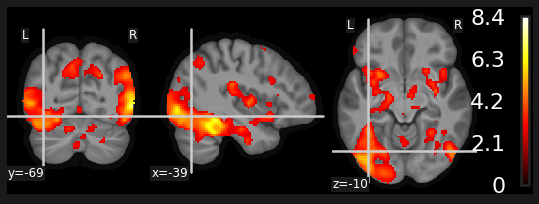

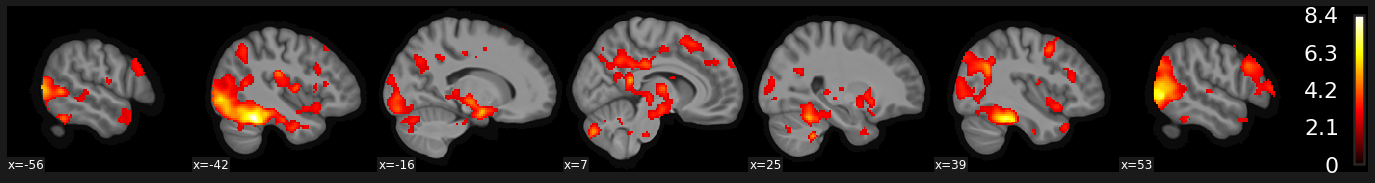

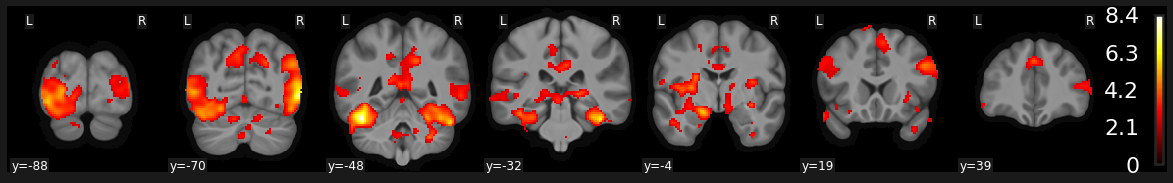

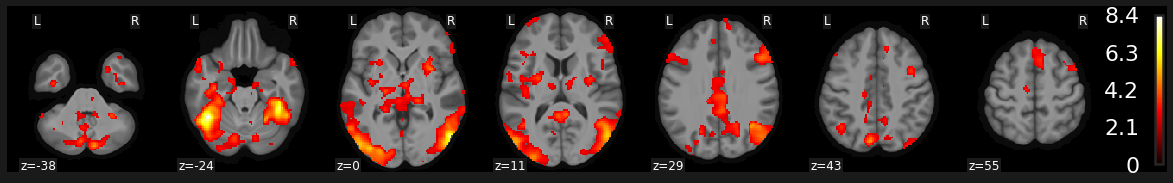

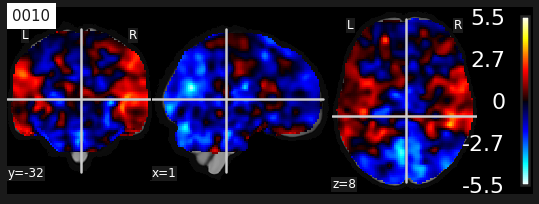

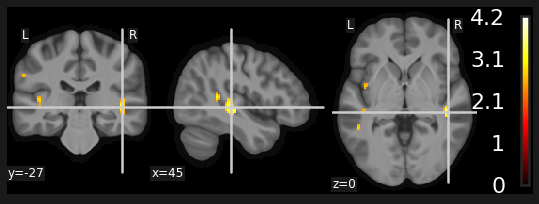

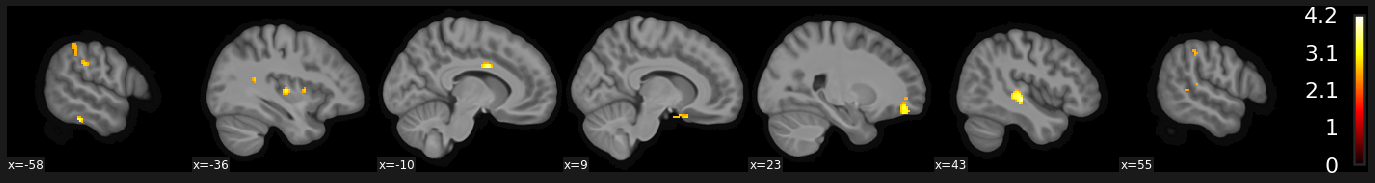

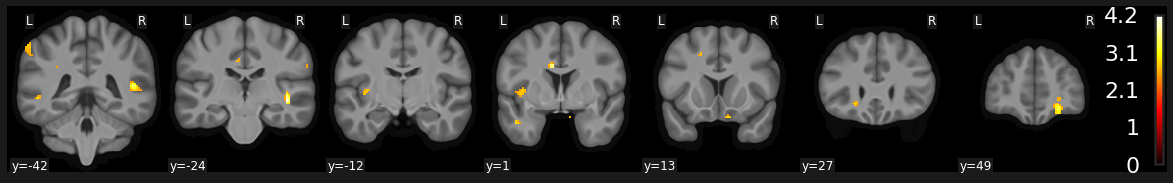

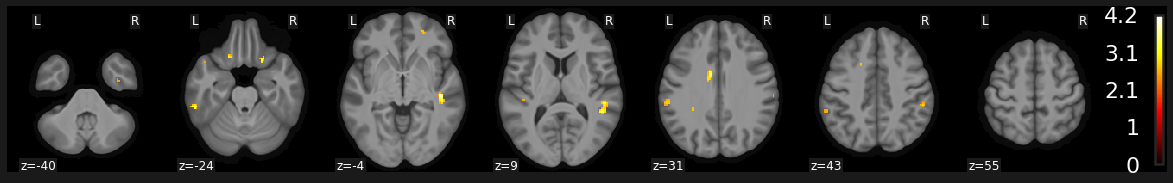

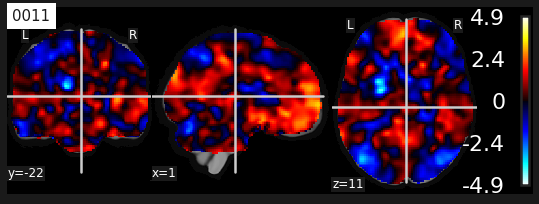

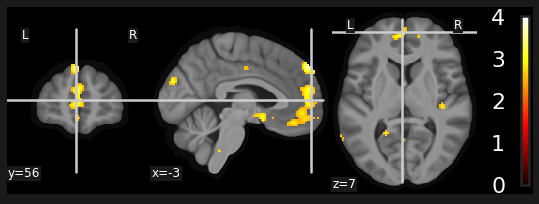

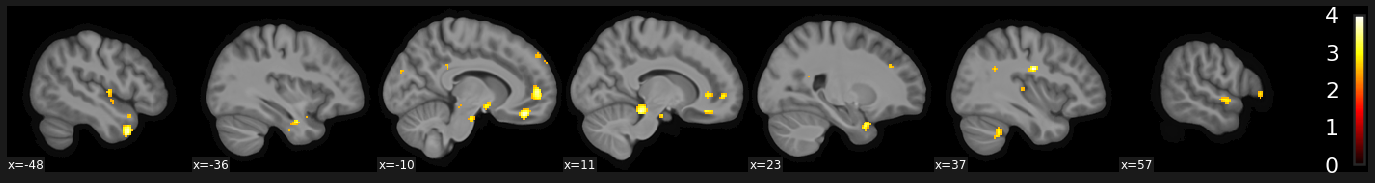

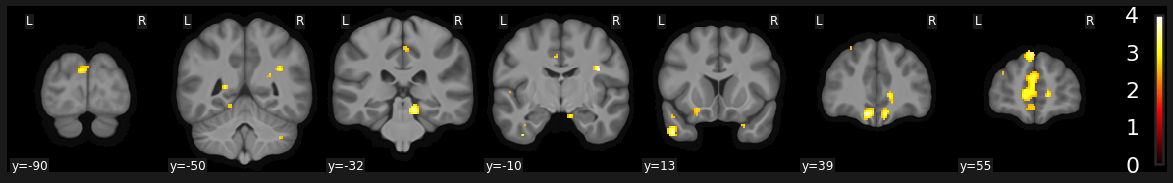

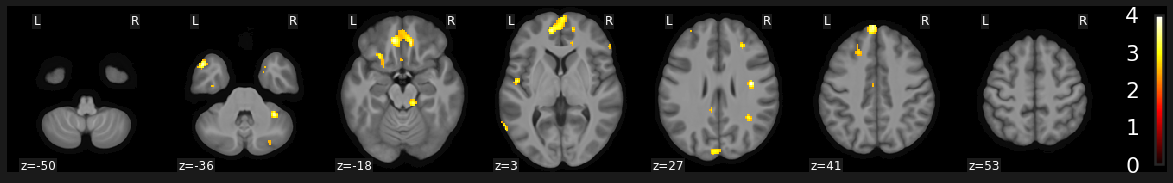

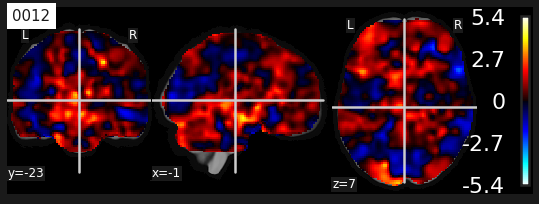

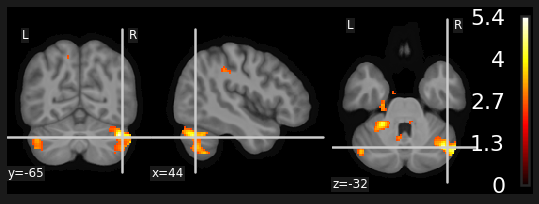

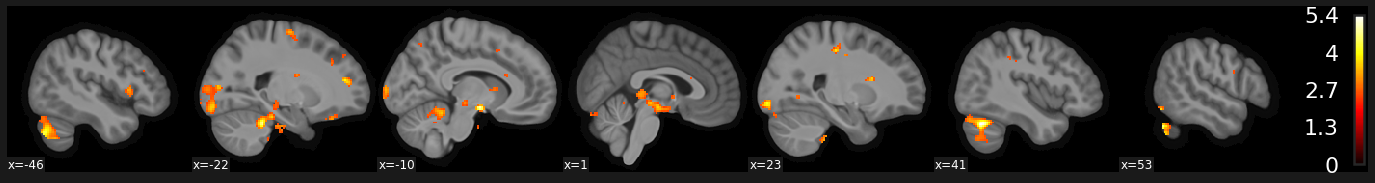

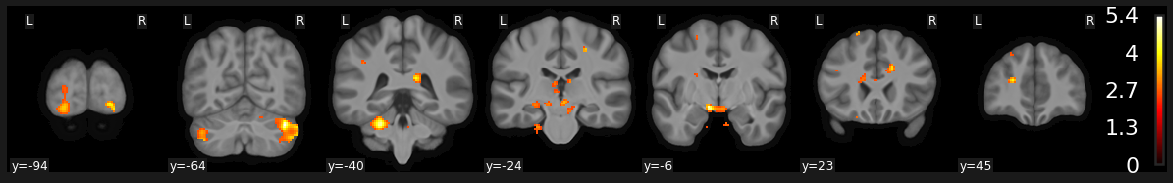

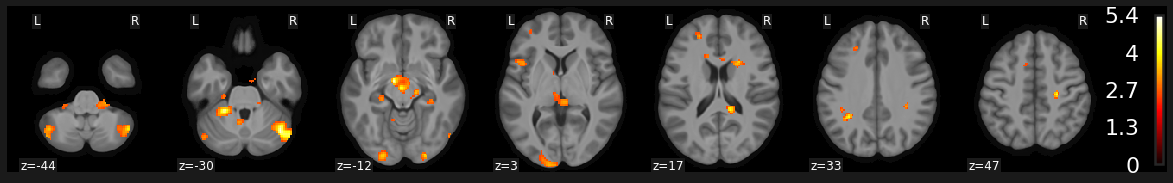

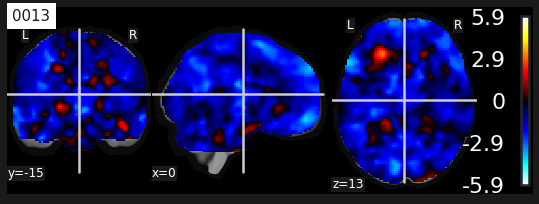

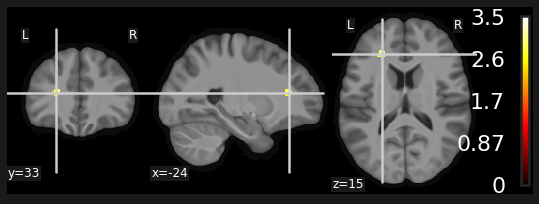

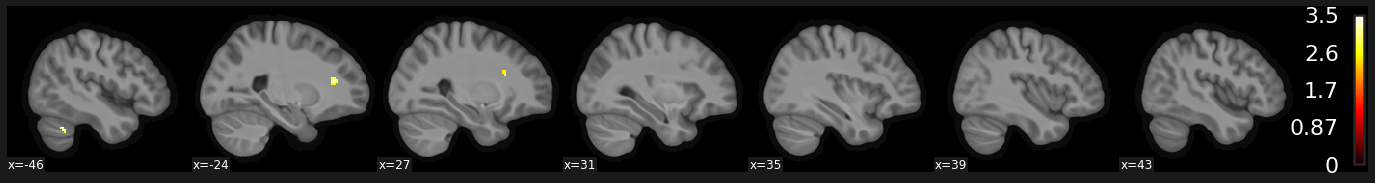

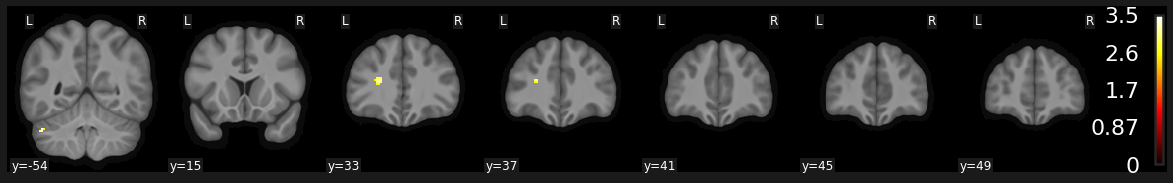

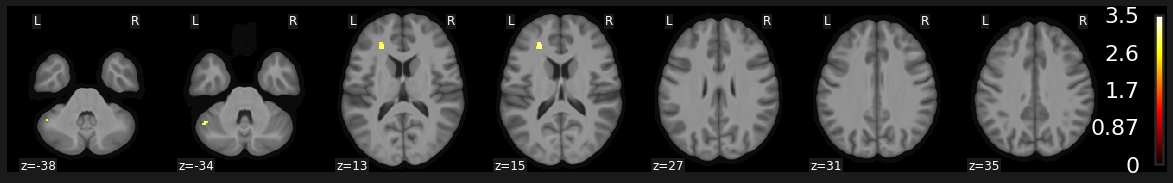

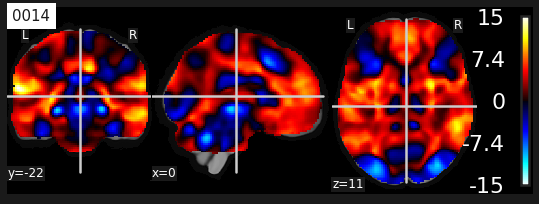

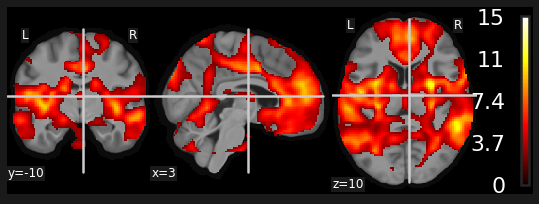

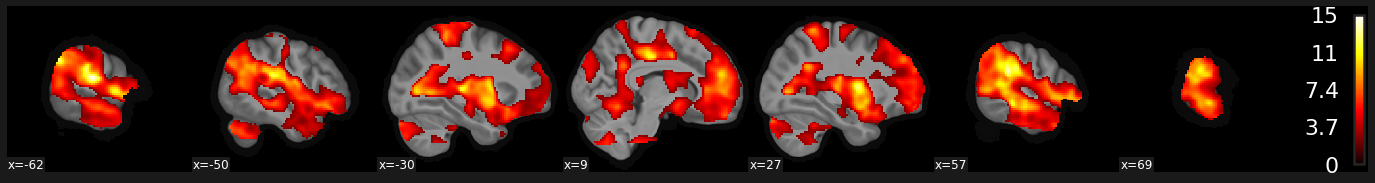

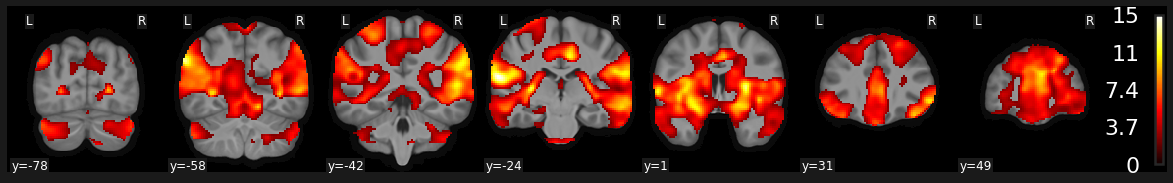

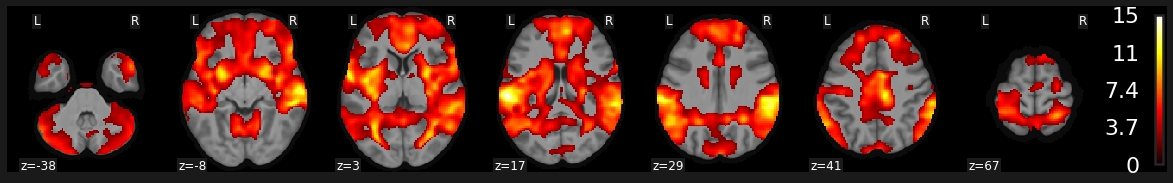

In [15]:
# visualize thresholded t values
con_ids = ['0009', '0010', '0011', '0012', '0013', '0014']
voxel_threshold = 0.01

for con_id in con_ids:
    
    t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p%s_tstat1.nii.gz' %(con_id, voxel_threshold))
    p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p%s_clustere_corrp_tstat1.nii.gz' %(con_id, voxel_threshold))

    # thr = 0.95
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()

    # threshold raw t map by p values
    p_mask = p_data == 0
    t_plot_data[p_mask] = 0    
    
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p%s_tstat1.nii.gz' %(con_id, voxel_threshold),
                          bg_img = anat_mean,
                          title = con_id)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="x", 
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="y",
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="z",
                           colorbar=True)

In [9]:
con_id = '0010'
t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/con%s_p0.001_tstat1.nii.gz' %con_id)

In [11]:
tmp = t_plot.get_data()

In [19]:
size = tmp.shape

In [20]:
size[0]*size[1]*size[2]

1082035

## TFCE

Positive SV maps <a class = "anchor" id = "tfce_pos-bullet"></a>

In [ ]:
# concatenate scans
# con_id = '0012'

# con_all = {}

# for i in sub_num:
#     con_image = glob.glob('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_reward/1stLevel/_subject_id_' + str(i) + '/con_' + con_id + '.nii')
#     con_all[str(i)] = list(con_image)
# # con_all
# # len(con_all)

# # smooth, fwhm = none
# smooth_con_all = []

# for k, v in con_all.items():
#     smooth_con = image.smooth_img(v[0],None) #  If fwhm is None, no filtering is performed (useful when just removal of non-finite values is needed).
#     print(v)
#     smooth_con_all.append(smooth_con)
    
# #     plotting.plot_glass_brain(smooth_con, colorbar = True)

# # concatenate
# con_concat = image.concat_imgs(smooth_con_all, auto_resample = True)
# con_concat.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_reward', 'reward_glm_con%s_all_sub.nii.gz' %con_id))



In [ ]:
con_id = '0012'
cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_reward', 'reward_glm_con%s_all_sub.nii.gz' %con_id),
                            mask = '/home/rj299/project/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                            base_name = os.path.join(out_root, 'imaging', 'Sink_resp_reward', 'con%s' %con_id),
                            one_sample_group_mean = True,
                            tfce = True,
                            vox_p_values = True,
                            num_perm = 5000)
cluster_thr.run()

In [ ]:
# p maps
con_ids = ['0012']
# con_id = '0013'

for con_id in con_ids:

    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_reward/con%s_tfce_corrp_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                           display_mode = 'x',
                           colorbar=True)
    
#     plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/sv_map_correction/con%s_tfce_corrp_tstat1.nii.gz' %con_id,
#                           bg_img = anat_mean,
#                            display_mode = 'x',
#                            threshold = 0.8, 
#                            colorbar=True)

In [ ]:
# visualize thresholded t values
con_ids = ['0012']


for con_id in con_ids:
    
    t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_reward/con%s_tstat1.nii.gz' %con_id)
    p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_reward/con%s_tfce_corrp_tstat1.nii.gz' %con_id)

    # thr = 0.95
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()

    # threshold raw t map by p values
    p_mask = p_data == 0
    t_plot_data[p_mask] = 0    
    
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_reward/con%s_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                          title = con_id)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="x", 
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="y",
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="z",
                           colorbar=True)

Flipped, Negative SV maps <a class = "anchor" id = "tfce_neg-bullet"></a>

In [ ]:
# flipped
con_ids = ['0012', '0013']

for con_id in con_ids:
#     con_id = '0010'

    con_all = {}

    for i in sub_num:
        con_image = glob.glob('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_' + str(i) + '/con_' + con_id + '.nii')
        con_all[str(i)] = list(con_image)
    # con_all
    # len(con_all)

    # smooth, fwhm = none
    smooth_con_all = []

    for k, v in con_all.items():
        smooth_con = image.smooth_img(v[0],None) #  If fwhm is None, no filtering is performed (useful when just removal of non-finite values is needed).
        smooth_con_all.append(smooth_con)

    #     plotting.plot_glass_brain(smooth_con, colorbar = True)

    # flip sign for negative SV maps
    smooth_con_flip_all = []

    for smooth_img in smooth_con_all:
        smooth_img_flip = image.math_img("-img", img=smooth_img)
        smooth_con_flip_all.append(smooth_img_flip)

    # concatenate    
    con_concat_flip = image.concat_imgs(smooth_con_flip_all, auto_resample = True)
    con_concat_flip.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_flip_all_sub.nii.gz' %con_id))


    cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_flip_all_sub.nii.gz' %con_id),
                                mask = '/home/rj299/scratch60/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                                base_name = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'con%s_flip' %con_id),
                                one_sample_group_mean = True,
                                tfce = True,
                                vox_p_values = True,
                                num_perm = 5000)
    cluster_thr.run()

In [ ]:
# p maps
con_ids = ['0012', '0013']
# con_id = '0013'

for con_id in con_ids:

    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tfce_corrp_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                           display_mode = 'x',
#                            threshold = 8,
                           colorbar=True)
    

In [ ]:
# visualize thresholded t values
con_ids = ['0012', '0013']


for con_id in con_ids:
    
    t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tstat1.nii.gz' %con_id)
    p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tfce_corrp_tstat1.nii.gz' %con_id)

#     thr = 0.95
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()

    # threshold raw t map by p values
#     p_mask = p_data < thr
    p_mask = p_data == 0
    t_plot_data[p_mask] = 0    
    
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                          title = con_id)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="x", 
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="y",
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="z",
                           colorbar=True)

## ROI analysis <a class = "anchor" id = "roi-bullet"></a>

In [7]:
# Contrast index:
# cond_names = ['Med_5', 'Med_8', 'Med_12', 'Med_25',
#               'Mon_5', 'Mon_8', 'Mon_12', 'Mon_25', 'Resp']

# cont1 = ('Med_5', 'T', cond_names, [1, 0, 0, 0, 0, 0, 0, 0, 0])
# cont2 = ('Med_8', 'T', cond_names, [0, 1, 0, 0, 0, 0, 0, 0, 0])
# cont3 = ('Med_12', 'T', cond_names, [0, 0, 1, 0, 0, 0, 0, 0, 0])
# cont4 = ('Med_25', 'T', cond_names, [0, 0, 0, 1, 0, 0, 0, 0, 0])

# cont5 = ('Med_25>5', 'T', cond_names, [-1, 0, 0, 1, 0b, 0, 0, 0, 0])
# cont6 = ('Med_25>8', 'T', cond_names, [0, -1, 0, 1, 0, 0, 0, 0, 0])
# cont7 = ('Med_25>12', 'T', cond_names, [0, 0, -1, 1, 0, 0, 0, 0, 0])

# cont8 = ('Mon_5', 'T', cond_names, [0, 0, 0, 0, 1, 0, 0, 0, 0])
# cont9 = ('Mon_8', 'T', cond_names, [0, 0, 0, 0, 0, 1, 0, 0, 0])
# cont10 = ('Mon_12', 'T', cond_names, [0, 0, 0, 0, 0, 0, 1, 0, 0])
# cont11 = ('Mon_25', 'T', cond_names, [0, 0, 0, 0, 0, 0, 0, 1, 0])

# cont12 = ('Mon_25>5', 'T', cond_names, [0, 0, 0, 0, -1, 0, 0, 1, 0])
# cont13 = ('Mon_25>8', 'T', cond_names, [0, 0, 0, 0, 0, -1, 0, 1, 0])
# cont14 = ('Mon_25>12', 'T', cond_names, [0, 0, 0, 0, 0, 0, -1, 1, 0])

# cont15 = ('Response', 'T', cond_names, [0, 0, 0, 0, 0, 0, 0, 0, 1])

In [37]:
data_root

'/home/rj299/project/mdm_analysis/'

In [16]:
# Masker files
maskfile_vmpfc = os.path.join(data_root,'output','imaging', 'binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz')
maskfile_vstr = os.path.join(data_root,'output','imaging', 'binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz')
mask_file_rppf = os.path.join(data_root,'output','imaging', 'Gilaie-DotanEtAl_2014_Study1_rPPC-NScorr-Thres250Voxels_roi.nii')
maskfile_roi1 = os.path.join(data_root,'output','imaging', 'none_glm_Med_Mon_TFCE_p001_roi1.nii.gz')
maskfile_roi2 = os.path.join(data_root,'output','imaging', 'none_glm_Med_Mon_TFCE_p001_roi2.nii.gz')
maskfile_roi3 = os.path.join(data_root,'output','imaging', 'none_glm_Med_Mon_TFCE_p001_roi3.nii.gz')

maskfiles = {'vmpfc': maskfile_vmpfc, 
             'vstr': maskfile_vstr, 
             'rppc': mask_file_rppf,
             'med_mon_1': maskfile_roi1, 
             'med_mon_2': maskfile_roi2, 
             'med_mon_3': maskfile_roi3}

# roi inputs are loaded images
all_masks = {key_name: nib.load(maskfiles[key_name]) for key_name in maskfiles.keys()}

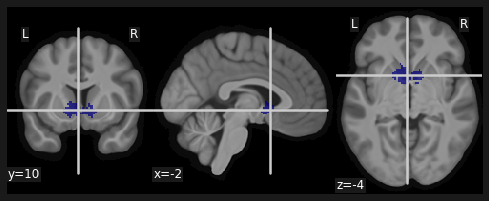

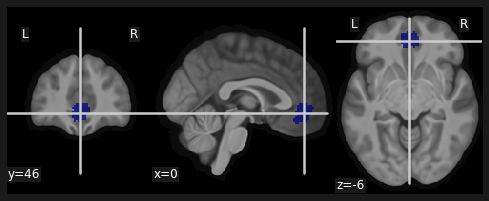

In [17]:
plotting.plot_roi(all_masks['vstr'], bg_img = anat_mean)
plotting.plot_roi(all_masks['vmpfc'], bg_img = anat_mean)

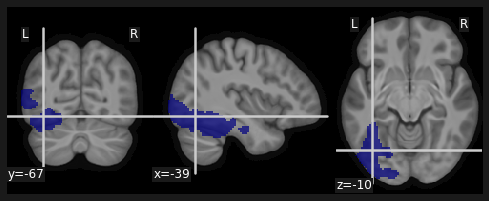

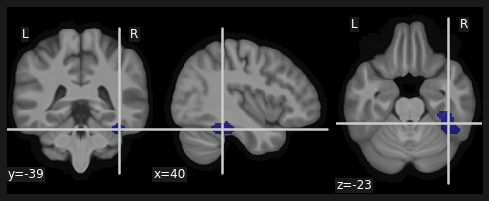

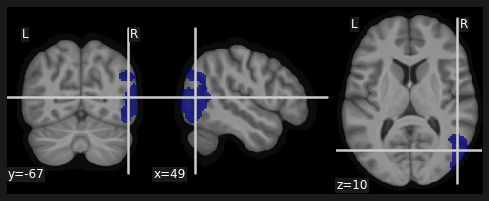

In [18]:
plotting.plot_roi(all_masks['med_mon_1'], bg_img = anat_mean)
plotting.plot_roi(all_masks['med_mon_2'], bg_img = anat_mean)
plotting.plot_roi(all_masks['med_mon_3'], bg_img = anat_mean)

In [19]:
# vStr
# extract betas (t) from ROI

con_ids = ['0010', '0011','0012', '0013']
con_names = ["med_amb", "med_risk", "mon_amb", "mon_risk"]

betas = []

for (idx, con_id) in enumerate(con_ids):
    
    beta = []
    for sub in sub_num:

        masker = NiftiMasker(os.path.join(data_root,"output", "imaging", "binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz"))

#         beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_%s/con_%s.nii' %(sub, con_id))
        beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_%s/spmT_%s.nii' %(sub, con_id))
        
        # average of beta from this ROI, a list of all participants
        beta.append(np.mean(beta_sub[0]))
    
    # a list of 
    betas.append(np.array(beta))
    
# plot
# calculate mean and se
betas_mean = np.mean(betas, axis = 1)
betas_se = stats.sem(betas, axis = 1)

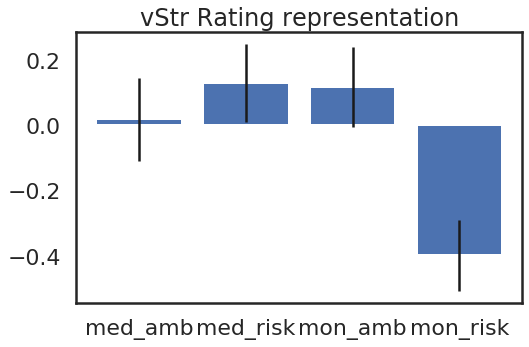

In [20]:
fig, ax = plt.subplots(1,1,figsize = (8,5))
ax.bar(range(len(con_names)), betas_mean, yerr = betas_se, tick_label = con_names)
ax.set_title("vStr Rating representation")
plt.show()

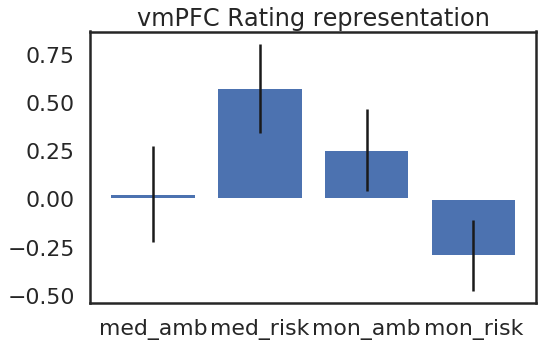

In [21]:
# vmPFC
# extract betas (t) from ROI

con_ids = ['0010', '0011','0012', '0013']
con_names = ["med_amb", "med_risk", "mon_amb", "mon_risk"]

betas = []

for (idx, con_id) in enumerate(con_ids):
    
    beta = []
    for sub in sub_num:

        masker = NiftiMasker(os.path.join(data_root,"output", "imaging", "binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz"))

#         beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_%s/con_%s.nii' %(sub, con_id))
        beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_%s/spmT_%s.nii' %(sub, con_id))
        
        # average of beta from this ROI, a list of all participants
        beta.append(np.mean(beta_sub[0]))
    
    # a list of 
    betas.append(np.array(beta))
    
# plot
# calculate mean and se
betas_mean = np.mean(betas, axis = 1)
betas_se = stats.sem(betas, axis = 1)

fig, ax = plt.subplots(1,1,figsize = (8,5))
ax.bar(range(len(con_names)), betas_mean, yerr = betas_se, tick_label = con_names)
ax.set_title("vmPFC Rating representation")
plt.show()

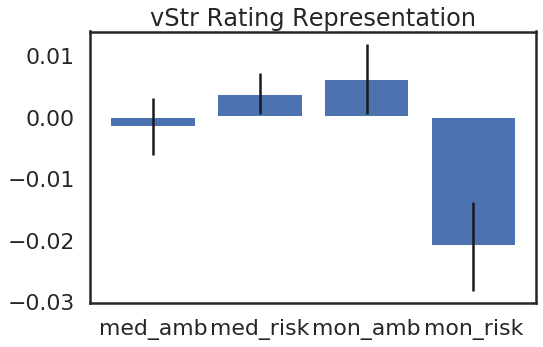

In [24]:
# vStr
# extract betas (con) from ROI

con_ids = ['0010', '0011','0012', '0013']
con_names = ["med_amb", "med_risk", "mon_amb", "mon_risk"]

betas = []

for (idx, con_id) in enumerate(con_ids):
    
    beta = []
    for sub in sub_num:

        masker = NiftiMasker(os.path.join(data_root, "output", "imaging", "binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz"))

        img = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_%s/con_%s.nii' %(sub, con_id))
        img_data = img.get_data()
        img_data[np.isnan(img_data)] =0
        beta_sub = masker.fit_transform(img)
        
#         beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_%s/spmT_%s.nii' %(sub, con_id))
        
    # average of beta from this ROI, a list of all participants
        beta.append(np.mean(beta_sub[0]))
    
    # a list of 
    betas.append(np.array(beta))
    
# plot
# calculate mean and se
betas_mean = np.mean(betas, axis = 1)
betas_se = stats.sem(betas, axis = 1)

fig, ax = plt.subplots(1,1,figsize = (8,5))
ax.bar(range(len(con_names)), betas_mean, yerr = betas_se, tick_label = con_names)
ax.set_title("vStr Rating Representation")
plt.show()

fig.savefig(os.path.join(out_root,"imaging","Sink_resp_rating", "Bartra_vStr_roi_rating.eps"), format = 'eps')

In [ ]:
#stats
for (con_idx, con_id) in enumerate(con_ids):
    print(stats.ttest_1samp(betas[con_idx], popmean = 0))

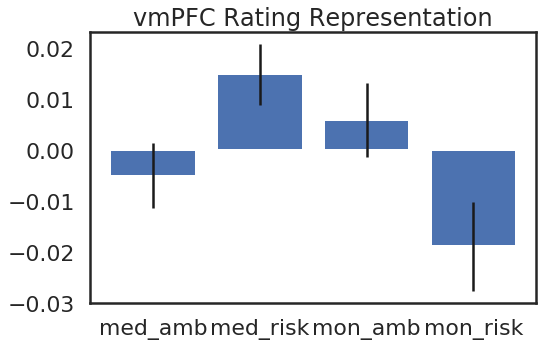

In [25]:
# vmPFC
# extract betas (t) from ROI

con_ids = ['0010', '0011','0012', '0013']
con_names = ["med_amb", "med_risk", "mon_amb", "mon_risk"]

betas = []

for (idx, con_id) in enumerate(con_ids):
    
    beta = []
    for sub in sub_num:

        masker = NiftiMasker(os.path.join(data_root, "output", "imaging", "binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz"))
        
        img = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_rating/1stLevel/_subject_id_%s/con_%s.nii' %(sub, con_id))
        img_data = img.get_data()
        img_data[np.isnan(img_data)] =0
        beta_sub = masker.fit_transform(img)
        
#         beta_sub = masker.fit_transform('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_%s/spmT_%s.nii' %(sub, con_id))
        
        # average of beta from this ROI, a list of all participants
        beta.append(np.mean(beta_sub[0]))
    
    # a list of 
    betas.append(np.array(beta))
    
# plot
# calculate mean and se
betas_mean = np.mean(betas, axis = 1)
betas_se = stats.sem(betas, axis = 1)

fig, ax = plt.subplots(1,1,figsize = (8,5))
ax.bar(range(len(con_names)), betas_mean, yerr = betas_se, tick_label = con_names)
ax.set_title("vmPFC Rating Representation")
plt.show()

fig.savefig(os.path.join(out_root,"imaging","Sink_resp_rating", "Bartra_vmPFC_roi_rating.eps"), format = 'eps')

In [ ]:
#stats
for (con_idx, con_id) in enumerate(con_ids):
    print(stats.ttest_1samp(betas[con_idx], popmean = 0))